In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
import mne
from mne.datasets import eegbci
from mne.io import *
from mne.time_frequency import tfr_multitaper
from mne.stats import permutation_cluster_1samp_test as pcluster_test


def center_cmap(cmap, vmin, vmax):
    """Center given colormap (ranging from vmin to vmax) at value 0.

    Note that eventually this could also be achieved by re-normalizing a given
    colormap by subclassing matplotlib.colors.Normalize as described here:
    https://matplotlib.org/users/colormapnorms.html#custom-normalization-two-linear-ranges
    """  # noqa: E501
    vzero = abs(vmin) / (vmax - vmin)
    index_old = np.linspace(0, 1, cmap.N)
    index_new = np.hstack([np.linspace(0, vzero, cmap.N // 2, endpoint=False),
                           np.linspace(vzero, 1, cmap.N // 2)])
    cdict = {"red": [], "green": [], "blue": [], "alpha": []}
    for old, new in zip(index_old, index_new):
        r, g, b, a = cmap(old)
        cdict["red"].append((new, r, r))
        cdict["green"].append((new, g, g))
        cdict["blue"].append((new, b, b))
        cdict["alpha"].append((new, a, a))
    return LinearSegmentedColormap("erds", cdict)


# load and preprocess data ####################################################
subject = 1  # use data from subject 1
runs = [6, 10, 14]  # use only hand and feet motor imagery runs

fnames = eegbci.load_data(subject, runs)
raws = [read_raw_edf(f, preload=True, stim_channel='auto') for f in fnames]
raw = concatenate_raws(raws)

raw.rename_channels(lambda x: x.strip('.'))  # remove dots from channel names

events = mne.find_events(raw, shortest_event=0, stim_channel='STI 014')

picks = mne.pick_channels(raw.info["ch_names"], ["C3", "Cz", "C4"])

# epoch data ##################################################################
tmin, tmax = -1, 4  # define epochs around events (in s)
event_ids = dict(hands=2, feet=3)  # map event IDs to tasks

epochs = mne.Epochs(raw, events, event_ids, tmin - 0.5, tmax + 0.5,
                    picks=picks, baseline=None, preload=True)

# compute ERDS maps ###########################################################
# freqs = np.arange(2, 36, 1)  # frequencies from 2-35Hz
# n_cycles = freqs  # use constant t/f resolution
# vmin, vmax = -1, 1.5  # set min and max ERDS values in plot
# baseline = [-1, 0]  # baseline interval (in s)
# cmap = center_cmap(plt.cm.RdBu, vmin, vmax)  # zero maps to white
# kwargs = dict(n_permutations=100, step_down_p=0.05, seed=1,
#               buffer_size=None)  # for cluster test

# for event in event_ids:
#     tfr = tfr_multitaper(epochs[event], freqs=freqs, n_cycles=n_cycles,
#                          use_fft=True, return_itc=False, average=False,
#                          decim=2)
#     tfr.crop(tmin, tmax)
#     tfr.apply_baseline(baseline, mode="percent")

#     fig, axes = plt.subplots(1, 4, figsize=(12, 4),
#                              gridspec_kw={"width_ratios": [10, 10, 10, 1]})
#     for ch, ax in enumerate(axes[:-1]):  # for each channel
#         # positive clusters
#         _, c1, p1, _ = pcluster_test(tfr.data[:, ch, ...], tail=1, **kwargs)
#         # negative clusters
#         _, c2, p2, _ = pcluster_test(tfr.data[:, ch, ...], tail=-1, **kwargs)

#         # note that we keep clusters with p <= 0.05 from the combined clusters
#         # of two independent tests; in this example, we do not correct for
#         # these two comparisons
#         c = np.stack(c1 + c2, axis=2)  # combined clusters
#         p = np.concatenate((p1, p2))  # combined p-values
#         mask = c[..., p <= 0.05].any(axis=-1)

#         # plot TFR (ERDS map with masking)
#         tfr.average().plot([ch], vmin=vmin, vmax=vmax, cmap=(cmap, False),
#                            axes=ax, colorbar=False, show=False, mask=mask)

#         ax.set_title(epochs.ch_names[ch], fontsize=10)
#         ax.axvline(0, linewidth=1, color="black", linestyle=":")  # event
#         if not ax.is_first_col():
#             ax.set_ylabel("")
#             ax.set_yticklabels("")
#     fig.colorbar(axes[0].collections[1], cax=axes[-1])
#     fig.suptitle("ERDS ({})".format(event))
#     fig.show()

Extracting EDF parameters from /Users/pdespres/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S001/S001R06.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19999  =      0.000 ...   124.994 secs...
Extracting EDF parameters from /Users/pdespres/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S001/S001R10.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19999  =      0.000 ...   124.994 secs...
Extracting EDF parameters from /Users/pdespres/mne_data/MNE-eegbci-data/physiobank/database/eegmmidb/S001/S001R14.edf...
EDF file detected
EDF annotations detected (consider using raw.find_edf_events() to extract them)
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19999  =      0.000 ..

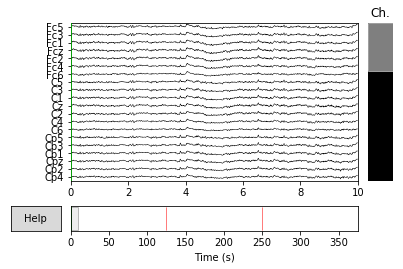

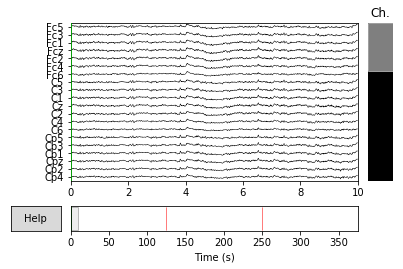

In [2]:
%matplotlib inline
raw.plot(scalings='auto')

Effective window size : 12.800 (s)
Channel locations not available. Disabling spatial colors.


<ipython-input-5-84c68b046ee3>:1: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  raw.plot_psd(tmax=np.inf, average=False)


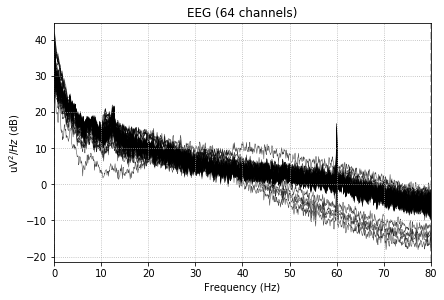

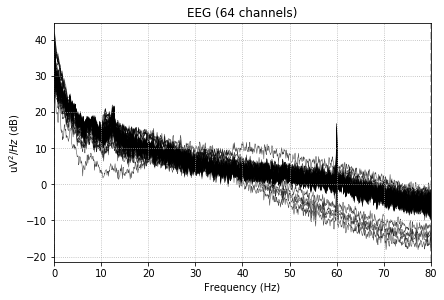

In [5]:
raw.plot_psd(tmax=np.inf, average=False)

In [5]:
print(find_edf_events(raw))
print(len(find_edf_events(raw)))
print(events)
print(len(events))

[[0.0, 4.2, 'T0'], [4.2, 4.1, 'T2'], [8.3, 4.2, 'T0'], [12.5, 4.1, 'T1'], [16.6, 4.2, 'T0'], [20.8, 4.1, 'T1'], [24.9, 4.2, 'T0'], [29.1, 4.1, 'T2'], [33.2, 4.2, 'T0'], [37.4, 4.1, 'T1'], [41.5, 4.2, 'T0'], [45.7, 4.1, 'T2'], [49.8, 4.2, 'T0'], [54.0, 4.1, 'T2'], [58.1, 4.2, 'T0'], [62.3, 4.1, 'T1'], [66.4, 4.2, 'T0'], [70.6, 4.1, 'T1'], [74.7, 4.2, 'T0'], [78.9, 4.1, 'T2'], [83.0, 4.2, 'T0'], [87.2, 4.1, 'T2'], [91.3, 4.2, 'T0'], [95.5, 4.1, 'T1'], [99.6, 4.2, 'T0'], [103.8, 4.1, 'T1'], [107.9, 4.2, 'T0'], [112.1, 4.1, 'T2'], [116.2, 4.2, 'T0'], [120.4, 4.1, 'T2']]
30
[[  672     0     3]
 [ 1328     0     1]
 [ 2000     0     2]
 [ 2656     0     1]
 [ 3328     0     2]
 [ 3984     0     1]
 [ 4656     0     3]
 [ 5312     0     1]
 [ 5984     0     2]
 [ 6640     0     1]
 [ 7312     0     3]
 [ 7968     0     1]
 [ 8640     0     3]
 [ 9296     0     1]
 [ 9968     0     2]
 [10624     0     1]
 [11296     0     2]
 [11952     0     1]
 [12624     0     3]
 [13280     0     1]
 [13

In [12]:
print(raw.info)
print(len(raw.info['ch_names']), raw.info['ch_names'])

<Info | 17 non-empty fields
    bads : list | 0 items
    buffer_size_sec : float | 1.0
    ch_names : list | Fc5, Fc3, Fc1, Fcz, Fc2, Fc4, Fc6, C5, C3, ...
    chs : list | 65 items (EEG: 64, STIM: 1)
    comps : list | 0 items
    custom_ref_applied : bool | False
    dev_head_t : Transform | 3 items
    events : list | 0 items
    highpass : float | 0.0 Hz
    hpi_meas : list | 0 items
    hpi_results : list | 0 items
    lowpass : float | 80.0 Hz
    meas_date : int | 1250093700
    nchan : int | 65
    proc_history : list | 0 items
    projs : list | 0 items
    sfreq : float | 160.0 Hz
    acq_pars : NoneType
    acq_stim : NoneType
    ctf_head_t : NoneType
    description : NoneType
    dev_ctf_t : NoneType
    dig : NoneType
    experimenter : NoneType
    file_id : NoneType
    gantry_angle : NoneType
    hpi_subsystem : NoneType
    kit_system_id : NoneType
    line_freq : NoneType
    meas_id : NoneType
    proj_id : NoneType
    proj_name : NoneType
    subject_info : None

In [18]:
print(epochs)

<Epochs  |   45 events (all good), -1.5 - 4.5 sec, baseline off, ~1024 kB, data loaded,
 'feet': 24
 'hands': 21>


In [24]:
print(len(find_edf_events(raw)))
print(len(events))

30
89
